# Quality Assessment
Now it's your turn. Follow [the steps on the platform](https://platform.wbscodingschool.com/courses/data-science/9474/) and use what you've learnt to see how reliable the data is.

In [1]:
import pandas as pd

Load our cleaned DataFrames

In [2]:
# orders_cl.csv
url = "https://drive.google.com/file/d/1Tla62vfu__kCqvgypZyVt2S9VuC016yH/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orders_cl = pd.read_csv(path)

# orderlines_cl.csv
url = "https://drive.google.com/file/d/1OhtkQS2fwOYdzfd-qPh7im35iLc-L9TA/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
orderlines_cl = pd.read_csv(path)

# products_cl.csv
url = "https://drive.google.com/file/d/1s7Lai4NSlsYjGEPg1QSOUJobNYVsZBOJ/view?usp=sharing" 
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
products_cl = pd.read_csv(path)

## 1.&nbsp; Define Pandas display format

In [3]:
pd.set_option("display.float_format", lambda x: "%.2f" % x)
pd.set_option("display.max_rows", 1000)

## 2.&nbsp; Exclude unwanted orders

### Include only actual purchases i.e. 'completed'
No `shopping cart`, `cancelled` etc...

Let's create a copy of the `orders_cl` DataFrame, to make sure any of our changes won't affect the original DataFrame.

In [4]:
completed_orders_df = orders_cl.copy()

In [5]:
completed_orders_df.head()

,order_id,created_date,total_paid,state
0,241319,2017-01-02 13:35:40,44.99,Cancelled
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
4,243784,2017-11-24 13:35:19,157.86,Cancelled


Let's look at the make up of `state`.

In [6]:
completed_orders_df.state.value_counts()

Shopping Basket    117809
Completed           46605
Place Order         40883
Pending             14374
Cancelled            7233
Name: state, dtype: int64

Seems like an ovewhelming amount of the orders are left in the shopping basket - something we'll have to analyse another time. For this task we're interested in only `completed` orders, so let's filter our DataFrame.

In [7]:
completed_orders_df = completed_orders_df.loc[completed_orders_df.state == "Completed", :]
completed_orders_df

,order_id,created_date,total_paid,state
1,241423,2017-11-06 13:10:02,136.15,Completed
2,242832,2017-12-31 17:40:03,15.76,Completed
3,243330,2017-02-16 10:59:38,84.98,Completed
5,245275,2017-06-28 11:35:37,149.00,Completed
6,245595,2017-01-21 12:52:47,112.97,Completed
...,...,...,...,...
226544,527042,2018-03-14 11:47:50,18.98,Completed
226572,527070,2018-03-14 11:50:48,24.97,Completed
226576,527074,2018-03-14 11:51:42,24.97,Completed
226598,527096,2018-03-14 11:58:40,34.96,Completed


In [8]:
#orders_cl = orders_cl[orders_cl['state']=='Completed']
#orders_cl 

#below code for certain drop columns
#my_ord = orders_cl.drop(orders_cl[(orders_cl['state'] == 'Shopping Basket') | (orders_cl['state'] == 'Place Order') | (orders_cl['state'] == 'Pending') | (orders_cl['state'] == 'Cancelled')].index, inplace=True)
#my_ord

Next, we'll make a list of the `order_id`'s of the `Completed` orders.

In [9]:
completed_orders_list = list(completed_orders_df["order_id"])
completed_orders_list

[241423,
 242832,
 243330,
 245275,
 245595,
 245941,
 246018,
 246405,
 247524,
 247643,
 250275,
 251302,
 251688,
 251969,
 253220,
 253306,
 253307,
 254301,
 254341,
 254441,
 254816,
 256158,
 256679,
 256799,
 257280,
 257847,
 258155,
 258530,
 258985,
 259192,
 259283,
 259668,
 260615,
 261289,
 261656,
 261978,
 262016,
 262236,
 263733,
 263738,
 263996,
 264244,
 265614,
 265951,
 265954,
 265968,
 266727,
 267014,
 267194,
 267375,
 268174,
 268234,
 268629,
 268659,
 268700,
 269083,
 269440,
 272512,
 274043,
 274166,
 274550,
 277363,
 277367,
 277994,
 278926,
 279632,
 279755,
 279891,
 280008,
 280867,
 281222,
 281302,
 281492,
 281497,
 282180,
 282487,
 282776,
 284200,
 284739,
 285098,
 285115,
 285582,
 286098,
 286842,
 286974,
 287311,
 287733,
 287780,
 288502,
 288567,
 289028,
 289387,
 289685,
 290018,
 290223,
 290383,
 290393,
 290487,
 290755,
 291147,
 291378,
 292183,
 293164,
 293265,
 293308,
 294278,
 294377,
 294617,
 294699,
 295228,
 295304,
 

Now we can filter our cleaned DataFrames to include only the `order_id`'s in the list we just made. We'll also change the DataFrames from `_cl` to `_qu`, so we can distinguish between the data that has been cleaned, and that which has been quality controlled.

In [10]:
orders_qu = orders_cl.loc[orders_cl["order_id"].isin(completed_orders_list), :].copy()
orders_qu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46605 entries, 1 to 226614
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      46605 non-null  int64  
 1   created_date  46605 non-null  object 
 2   total_paid    46605 non-null  float64
 3   state         46605 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.8+ MB


In [11]:
orderlines_qu = orderlines_cl.loc[orderlines_cl["id_order"].isin(completed_orders_list), :].copy()
orderlines_qu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56714 entries, 6 to 215949
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                56714 non-null  int64  
 1   id_order          56714 non-null  int64  
 2   product_id        56714 non-null  int64  
 3   product_quantity  56714 non-null  int64  
 4   sku               56714 non-null  object 
 5   unit_price        56714 non-null  float64
 6   date              56714 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 3.5+ MB


### Keep only the orders that are present in both `orders` and `orderlines`
Let's begin by looking if there's a big difference between the amount of orders present in `orders` and `orderlines`.

In [12]:
len(list(orders_qu.order_id.unique()))

46605

In [13]:
len(list(orderlines_qu.id_order.unique()))

43064

we can check with len() or nunique()

In [14]:
orderlines_qu.id_order.nunique()

43064

In [15]:
orders_qu.order_id.nunique()

46605

Approximately 3000 difference!!! Let's fix that. We'll perform an inner merge on the two tables using the `order_id` & `id_order`. This will then keep only the `order_id`'s that are present in both tables, which will then help us filter our `_qu` DataFrames once again.

In [16]:
orders_lines_merged_df = orders_qu.merge(orderlines_qu, how="inner", left_on="order_id", right_on="id_order")
orders_lines_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56714 entries, 0 to 56713
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          56714 non-null  int64  
 1   created_date      56714 non-null  object 
 2   total_paid        56714 non-null  float64
 3   state             56714 non-null  object 
 4   id                56714 non-null  int64  
 5   id_order          56714 non-null  int64  
 6   product_id        56714 non-null  int64  
 7   product_quantity  56714 non-null  int64  
 8   sku               56714 non-null  object 
 9   unit_price        56714 non-null  float64
 10  date              56714 non-null  object 
dtypes: float64(2), int64(5), object(4)
memory usage: 5.2+ MB


In [17]:
orders_in_both_list = list(orders_lines_merged_df["order_id"].unique())
orders_in_both_list

[241423,
 242832,
 243330,
 245275,
 245595,
 246018,
 246405,
 247524,
 247643,
 250275,
 251302,
 251688,
 251969,
 253220,
 253306,
 253307,
 254301,
 254341,
 254441,
 254816,
 256158,
 256679,
 256799,
 257280,
 258155,
 258530,
 259192,
 259283,
 260615,
 261289,
 261656,
 261978,
 262236,
 263733,
 263738,
 263996,
 264244,
 265614,
 265951,
 265954,
 265968,
 266727,
 267014,
 267194,
 267375,
 268174,
 268234,
 268659,
 268700,
 269083,
 269440,
 272512,
 274043,
 274166,
 274550,
 277363,
 277367,
 278926,
 279632,
 279891,
 280008,
 280867,
 281222,
 281302,
 281492,
 281497,
 282487,
 282776,
 284739,
 285115,
 285582,
 286098,
 286842,
 286974,
 287311,
 288502,
 288567,
 289028,
 289387,
 289685,
 290383,
 290393,
 290755,
 291147,
 292183,
 293164,
 293308,
 294278,
 294377,
 294617,
 294699,
 295347,
 295723,
 296010,
 296036,
 296229,
 296253,
 296436,
 296502,
 296611,
 296847,
 297076,
 297148,
 297200,
 297220,
 297572,
 297809,
 298038,
 298161,
 298211,
 298506,
 

In [18]:
orders_qu = orders_qu.loc[orders_qu["order_id"].isin(orders_in_both_list), :]
orderlines_qu = orderlines_cl.loc[orderlines_cl["id_order"].isin(orders_in_both_list), :]

In [19]:
orders_qu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43064 entries, 1 to 226614
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      43064 non-null  int64  
 1   created_date  43064 non-null  object 
 2   total_paid    43064 non-null  float64
 3   state         43064 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.6+ MB


In [20]:
orderlines_qu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56714 entries, 6 to 215949
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                56714 non-null  int64  
 1   id_order          56714 non-null  int64  
 2   product_id        56714 non-null  int64  
 3   product_quantity  56714 non-null  int64  
 4   sku               56714 non-null  object 
 5   unit_price        56714 non-null  float64
 6   date              56714 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 3.5+ MB


Let's have a quick check to make sure we're filtering both DataFrames the same. They should both contain the same number of unique `order_id`'s.

In [21]:
len(list(orders_qu["order_id"].unique())), len(list(orderlines_qu["id_order"].unique()))

(43064, 43064)

## 3.&nbsp; Exclude orders with unknown products
Let's start by making a list of known products.

In [22]:
known_skus_list = list(products_cl["sku"])
products_cl["sku"].nunique()

9992

Let's have a look to see how many products in our `orderlines_qu` DataFrame are known and how many are unknown.

In [23]:
orderlines_qu.sku.isin(known_skus_list).value_counts()
orders_lines_merged_df.sku.isin(known_skus_list).value_counts()

True     55320
False     1394
Name: sku, dtype: int64

Looks like the vast majority of products are known. 

We can't simply delete the rows containing unknown products. We need to remove the entirety of any order that contains an unknown product. 

The 1st step is to identify any order that contains an unknown product. Then find the `order_id` of these orders. Finally filter these order numbers out of our `_qu` DataFrames.

In [24]:
orders_with_unknown_products_list = list(orderlines_qu.loc[~orderlines_qu.sku.isin(known_skus_list), "id_order"])
orders_with_unknown_products_list

[299638,
 299706,
 299712,
 299860,
 299881,
 299902,
 300029,
 300251,
 300283,
 300340,
 300558,
 301043,
 301178,
 301232,
 301307,
 301386,
 301419,
 301395,
 301480,
 301527,
 301528,
 301752,
 301764,
 301832,
 301854,
 301919,
 302069,
 302071,
 302078,
 302095,
 302130,
 302431,
 302447,
 302872,
 302890,
 301102,
 303158,
 303211,
 303234,
 303274,
 303478,
 300311,
 303568,
 303851,
 303945,
 304155,
 304240,
 304307,
 304358,
 304350,
 304477,
 304577,
 304922,
 305257,
 305281,
 305306,
 305417,
 305445,
 304363,
 305537,
 305552,
 305569,
 305574,
 305589,
 304924,
 304924,
 305644,
 305674,
 305709,
 305719,
 305501,
 305824,
 305852,
 305873,
 305903,
 306293,
 306419,
 306649,
 306743,
 306824,
 306894,
 306907,
 307079,
 307156,
 307203,
 307323,
 306980,
 307375,
 307445,
 307525,
 307538,
 307568,
 307715,
 307945,
 307969,
 308022,
 308025,
 308106,
 308132,
 308144,
 308164,
 308274,
 308376,
 308483,
 308683,
 308724,
 309065,
 309065,
 309056,
 309082,
 309296,
 

Now we can filter our DataFrame to exclude the `order_id`'s that contain unknown products

In [25]:
orders_qu = orders_qu.loc[~orders_qu["order_id"].isin(orders_with_unknown_products_list), :]
orderlines_qu = orderlines_qu.loc[~orderlines_qu["id_order"].isin(orders_with_unknown_products_list), :]

In [26]:
orders_lines_merged_df = orders_lines_merged_df.loc[~orders_lines_merged_df["order_id"].isin(orders_with_unknown_products_list), :]
orders_lines_merged_df.count()

order_id            54324
created_date        54324
total_paid          54324
state               54324
id                  54324
id_order            54324
product_id          54324
product_quantity    54324
sku                 54324
unit_price          54324
date                54324
dtype: int64

In [27]:
orders_qu.info()
orderlines_qu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41701 entries, 1 to 226614
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   order_id      41701 non-null  int64  
 1   created_date  41701 non-null  object 
 2   total_paid    41701 non-null  float64
 3   state         41701 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 1.6+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 54324 entries, 6 to 215949
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                54324 non-null  int64  
 1   id_order          54324 non-null  int64  
 2   product_id        54324 non-null  int64  
 3   product_quantity  54324 non-null  int64  
 4   sku               54324 non-null  object 
 5   unit_price        54324 non-null  float64
 6   date              54324 non-null  object 
dtypes: float64(1), int64(4), object(2)

Let's have a quick check to make sure we're filtering both DataFrames the same. They should both contain the same number of unique `order_id`'s.

In [28]:
len(list(orders_qu["order_id"].unique())), len(list(orderlines_qu["id_order"].unique()))

(41701, 41701)

In [29]:
orders_lines_merged_df.order_id.nunique()

41701

## 4.&nbsp; Explore the revenue from different tables

In [30]:
orderlines_qu_copy = orderlines_qu.copy()
orderlines_qu_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54324 entries, 6 to 215949
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                54324 non-null  int64  
 1   id_order          54324 non-null  int64  
 2   product_id        54324 non-null  int64  
 3   product_quantity  54324 non-null  int64  
 4   sku               54324 non-null  object 
 5   unit_price        54324 non-null  float64
 6   date              54324 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 3.3+ MB


#### Step 1:
Create the `unit_price_total` as `orderlines.unit_price` * `orderlines.product_quantity`

In [31]:
orderlines_qu_copy["unit_price_total"] = orderlines_qu_copy["product_quantity"] * orderlines_qu_copy["unit_price"]
orderlines_qu_copy["unit_price_total"]

6         47.49
7         18.99
8         72.19
15        60.90
21       142.49
          ...  
215889    16.52
215906    19.98
215911    19.98
215932    29.97
215949     9.99
Name: unit_price_total, Length: 54324, dtype: float64

In [32]:
orders_lines_merged_df["unit_price_total"] = orders_lines_merged_df["product_quantity"]*orders_lines_merged_df["unit_price"]
orders_lines_merged_df

,order_id,created_date,total_paid,state,id,id_order,product_id,product_quantity,sku,unit_price,date,unit_price_total
0,241423,2017-11-06 13:10:02,136.15,Completed,1398738,241423,0,1,LAC0212,129.16,2017-11-06 12:47:20,129.16
1,242832,2017-12-31 17:40:03,15.76,Completed,1529178,242832,0,1,PAR0074,10.77,2017-12-31 17:26:40,10.77
2,243330,2017-02-16 10:59:38,84.98,Completed,1181923,243330,0,1,OWC0074,77.99,2017-02-15 17:07:44,77.99
3,245275,2017-06-28 11:35:37,149.00,Completed,1276706,245275,0,1,TAD0007,149.00,2017-06-28 11:12:30,149.00
4,245595,2017-01-21 12:52:47,112.97,Completed,1154394,245595,0,2,PAC1561,52.99,2017-01-21 12:49:00,105.98
...,...,...,...,...,...,...,...,...,...,...,...,...
56709,527042,2018-03-14 11:47:50,18.98,Completed,1649446,527042,0,1,APP0927,13.99,2018-03-14 11:42:38,13.99
56710,527070,2018-03-14 11:50:48,24.97,Completed,1649512,527070,0,2,APP0698,9.99,2018-03-14 11:49:01,19.98
56711,527074,2018-03-14 11:51:42,24.97,Completed,1649522,527074,0,2,APP0698,9.99,2018-03-14 11:49:36,19.98
56712,527096,2018-03-14 11:58:40,34.96,Completed,1649565,527096,0,3,APP0698,9.99,2018-03-14 11:54:35,29.97


#### Step 2: 
Group by `order_id`, summarising by the sum of `unit_price_total`

In [33]:
orderlines_qu_group_order_df = orderlines_qu_copy.groupby("id_order", as_index=False)["unit_price_total"].sum()

In [34]:
orders_lines_merged_group_df = orders_lines_merged_df.groupby("id_order", as_index=False).sum()
orders_lines_merged_group_df.max()
orders_lines_merged_group_df.count()
orders_lines_merged_group_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41701 entries, 0 to 41700
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_order          41701 non-null  int64  
 1   order_id          41701 non-null  int64  
 2   total_paid        41701 non-null  float64
 3   id                41701 non-null  int64  
 4   product_id        41701 non-null  int64  
 5   product_quantity  41701 non-null  int64  
 6   unit_price        41701 non-null  float64
 7   unit_price_total  41701 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 2.5 MB


In [35]:
#orderlines_qu_group_order_df.max()
#orderlines_qu_group_order_df.count()
orders_lines_merged_group_df.max()

id_order             527112.00
order_id            6764446.00
total_paid            17133.84
id                 21235749.00
product_id                0.00
product_quantity         72.00
unit_price             2791.00
unit_price_total       6876.80
dtype: float64

### What is the average difference between `total_paid` and `unit_price_total`?

In [36]:
orders_qu_copy = orders_qu.copy()

Let's merge our grouped `orderlines` table with the `orders` table, so we can calculate the differences in prices.

In [37]:
diff_df = orders_qu_copy.merge(orderlines_qu_group_order_df, left_on="order_id", right_on="id_order")

In [38]:
#orders_lines_merged_group_df.info()

In [39]:
diff_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41701 entries, 0 to 41700
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          41701 non-null  int64  
 1   created_date      41701 non-null  object 
 2   total_paid        41701 non-null  float64
 3   state             41701 non-null  object 
 4   id_order          41701 non-null  int64  
 5   unit_price_total  41701 non-null  float64
dtypes: float64(2), int64(2), object(2)
memory usage: 2.2+ MB


In [40]:
diff_df["difference"] = diff_df["total_paid"] - diff_df["unit_price_total"]
diff_df


,order_id,created_date,total_paid,state,id_order,unit_price_total,difference
0,241423,2017-11-06 13:10:02,136.15,Completed,241423,129.16,6.99
1,242832,2017-12-31 17:40:03,15.76,Completed,242832,10.77,4.99
2,243330,2017-02-16 10:59:38,84.98,Completed,243330,77.99,6.99
3,245275,2017-06-28 11:35:37,149.00,Completed,245275,149.00,0.00
4,245595,2017-01-21 12:52:47,112.97,Completed,245595,105.98,6.99
...,...,...,...,...,...,...,...
41696,527042,2018-03-14 11:47:50,18.98,Completed,527042,13.99,4.99
41697,527070,2018-03-14 11:50:48,24.97,Completed,527070,19.98,4.99
41698,527074,2018-03-14 11:51:42,24.97,Completed,527074,19.98,4.99
41699,527096,2018-03-14 11:58:40,34.96,Completed,527096,29.97,4.99


In [41]:
orders_lines_merged_group_df["difference"] = orders_lines_merged_group_df["total_paid"] - orders_lines_merged_group_df["unit_price_total"]
orders_lines_merged_group_df


,id_order,order_id,total_paid,id,product_id,product_quantity,unit_price,unit_price_total,difference
0,241423,241423,136.15,1398738,0,1,129.16,129.16,6.99
1,242832,242832,15.76,1529178,0,1,10.77,10.77,4.99
2,243330,243330,84.98,1181923,0,1,77.99,77.99,6.99
3,245275,245275,149.00,1276706,0,1,149.00,149.00,0.00
4,245595,245595,112.97,1154394,0,2,52.99,105.98,6.99
...,...,...,...,...,...,...,...,...,...
41696,527042,527042,18.98,1649446,0,1,13.99,13.99,4.99
41697,527070,527070,24.97,1649512,0,2,9.99,19.98,4.99
41698,527074,527074,24.97,1649522,0,2,9.99,19.98,4.99
41699,527096,527096,34.96,1649565,0,3,9.99,29.97,4.99


Now that we know the difference for each order, we can compute the average.

In [42]:
diff_df.difference.mean().round(2)
diff_df.difference.sum()
diff_df.describe()

,order_id,total_paid,id_order,unit_price_total,difference
count,41701.00,41701.00,41701.00,41701.00,41701.00
mean,414946.28,195.64,414946.28,191.16,4.47
std,65923.10,251.86,65923.10,251.02,26.05
min,241423.00,0.00,241423.00,2.49,-165.00
25%,362647.00,46.98,362647.00,41.99,0.00
50%,417815.00,98.98,417815.00,94.97,4.99
75%,470878.00,246.98,470878.00,241.98,6.99
max,527112.00,6876.94,527112.00,6876.80,3984.99


In [43]:
orders_lines_merged_group_df.difference.mean().round(2)
orders_lines_merged_group_df.difference.sum()
orders_lines_merged_group_df.describe()

,id_order,order_id,total_paid,id,product_id,product_quantity,unit_price,unit_price_total,difference
count,41701.00,41701.00,41701.00,41701.00,41701.00,41701.00,41701.00,41701.00,41701.00
mean,414946.28,539799.10,290.08,1804907.90,0.00,1.47,176.45,191.16,98.92
std,65923.10,305642.17,581.71,997900.16,0.00,1.25,214.74,251.02,420.81
min,241423.00,241423.00,0.00,1119116.00,0.00,1.00,1.00,2.49,-165.00
25%,362647.00,378787.00,52.97,1296785.00,0.00,1.00,39.99,41.99,3.99
50%,417815.00,446469.00,114.20,1455845.00,0.00,1.00,89.87,94.97,4.99
75%,470878.00,516015.00,319.94,1624384.00,0.00,2.00,222.98,241.98,6.99
max,527112.00,6764446.00,17133.84,21235749.00,0.00,72.00,2791.00,6876.80,15230.09


### What is the distribution of these differences?

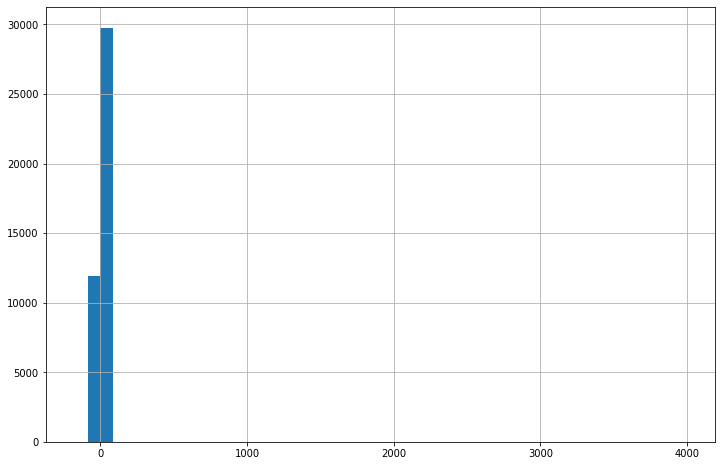

In [44]:
diff_df.difference.hist(bins= 50, figsize=(12,8));

Looking at the spread of the data above, some of the difference must be due to corruption. Let's use `.describe()` to investigate the distribution further.

In [45]:
diff_df.difference.describe()

count   41701.00
mean        4.47
std        26.05
min      -165.00
25%         0.00
50%         4.99
75%         6.99
max      3984.99
Name: difference, dtype: float64

In [62]:
diff_profit = diff_df[diff_df.difference>0]
diff_profit.info()
diff_profit.groupby(pd.Grouper(key='created_date',freq='M').mean())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 30417 entries, 0 to 41700
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          30417 non-null  int64  
 1   created_date      30417 non-null  object 
 2   total_paid        30417 non-null  float64
 3   state             30417 non-null  object 
 4   id_order          30417 non-null  int64  
 5   unit_price_total  30417 non-null  float64
 6   difference        30417 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 1.9+ MB


AttributeError: ignored

We can see from the our quartiles (0.00, 4.99, 6.99) that most of our data fits an expected pattern - free, 4.99, and 6.99 all seem like reasonable prices to assume as postage. However, look at the min and the max values, -165.00 and 3984.99, this can only occur due to corrupted data.

### Can all the differences be explained by shipping costs? If not, what are other plausible explanations?

What reasons have you come up with to explain the difference?

### If there are differences that you can’t explain: what should you do with these orders?
There's a rule of thumb, that anything: 
+ lower than the 25% quartile - (1.5 x interquartile range), or 
+ higher than the 75% quartile + (1.5 x interquartile range) 

is an outlier. Let's use this rule to try and exclude any corrupted data.

In [46]:
# calculate the quartiles
Q1 = diff_df["difference"].quantile(0.25)
Q3 = diff_df["difference"].quantile(0.75)

# calculate the interquartile range
IQR = Q3-Q1

# filter the DataFrame to include only "non-outliers"
diff_no_outliers_df = diff_df.loc[(diff_df["difference"] >= (Q1 - 1.5*IQR)) & (diff_df["difference"] <= (Q3 + 1.5*IQR)), :]

In [47]:
Q1 = orders_lines_merged_group_df["difference"].quantile(0.25)
Q3 = orders_lines_merged_group_df["difference"].quantile(0.75)

# calculate the interquartile range
IQR = Q3-Q1

# filter the DataFrame to include only "non-outliers"
my_diff_no_outliers_df = orders_lines_merged_group_df.loc[(orders_lines_merged_group_df["difference"] >= (Q1 - 1.5*IQR)) & (orders_lines_merged_group_df["difference"] <= (Q3 + 1.5*IQR)), :]

Let's look at the distribution again to see the affect of removing the outliers.

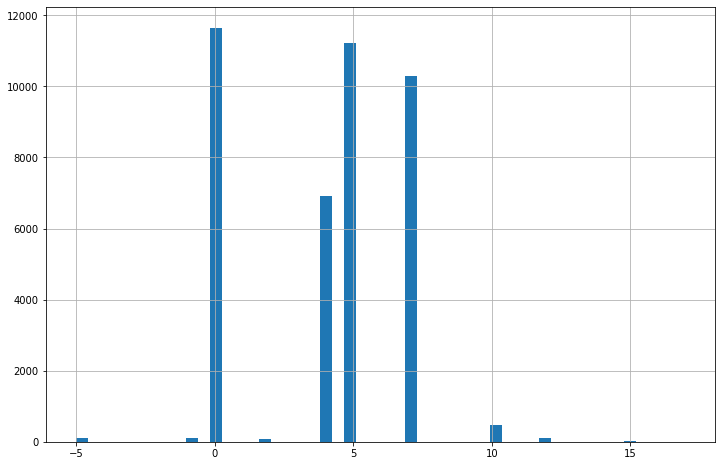

In [48]:
diff_no_outliers_df.difference.hist(bins= 50, figsize=(12,8));

This looks much more like what we would expect: a small difference, but nothing extreme.

Now we need to remove these orders with extreme differences from our `orders_lines_merged` DataFrame.

In [49]:
normal_diff_list = list(diff_no_outliers_df["order_id"])


In [50]:
my_normal_diff_list = list(my_diff_no_outliers_df["order_id"])

In [51]:
orders_qu = orders_qu.loc[orders_qu["order_id"].isin(normal_diff_list), :]
orderlines_qu = orderlines_cl.loc[orderlines_cl["id_order"].isin(normal_diff_list), :]
orders_lines_merged_group_df = orders_lines_merged_group_df.loc[orders_lines_merged_group_df["id_order"].isin(my_normal_diff_list), :]

In [52]:
orders_lines_merged_group_df.describe()


,id_order,order_id,total_paid,id,product_id,product_quantity,unit_price,unit_price_total,difference
count,32156.00,32156.00,32156.00,32156.00,32156.00,32156.00,32156.00,32156.00,32156.00
mean,415928.88,415928.88,173.10,1388444.13,0.00,1.13,156.70,169.08,4.02
std,65888.12,65888.12,223.21,151953.08,0.00,0.94,190.68,223.99,2.69
min,241423.00,241423.00,2.82,1119116.00,0.00,1.00,2.49,2.49,-0.02
25%,363630.50,363630.50,41.98,1266573.25,0.00,1.00,34.99,36.99,0.00
50%,418894.00,418894.00,87.97,1392335.50,0.00,1.00,79.99,83.16,4.99
75%,471723.75,471723.75,207.84,1516409.00,0.00,1.00,185.99,202.79,6.99
max,527112.00,527112.00,6876.94,1649593.00,0.00,72.00,999.99,6876.80,10.11


In [53]:
len(list(orders_qu["order_id"].unique())), len(list(orderlines_qu["id_order"].unique()))

(40985, 40985)

## 5.&nbsp; Become confident about your dataset

Let's hear your thoughts about what you discovered.

Let's not forget to download our quality controlled DataFrames

In [54]:
from google.colab import files

orders_qu.to_csv("orders_qu.csv", index=False)
files.download("orders_qu.csv")

orderlines_qu.to_csv("orderlines_qu.csv", index=False)
files.download("orderlines_qu.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>